## Predictive Modeling with Python:  Linear Regression
#### Author: Brian Vegetabile

### Goals of this Lesson
 
- Load in a baseball dataset. We'll be trying to predict players' salaries based on their season statistics (home runs, batting average, etc.)
  - Explore the data: simple plotting with `matplotlib`
- Present the fundamentals of linear regression for predictive modeling
    - Notation and Framework
    - Closed form matrix solutions for linear regression
        - Advantages and issues
    - Gradient descent for linear regression
        - Advantages and Issues
        - Code gradient descent to model player salaries  
    - Perform linear regression in `scikit-learn'


#### References for Linear Regression


- Elements of Statistical Learning by Hastie, Tibshriani, Friedman - Chapter 3 
- Alex Ihler's Course Notes on Linear Models for Regression - http://sli.ics.uci.edu/Classes/2015W-273a
- scikit-learn Documentation - http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
- Linear Regression Analysis By Seber and Lee - http://www.wiley.com/WileyCDA/WileyTitle/productCd-0471415405,subjectCd-ST24.html
- Applied Linear Regression by Weisberg - http://onlinelibrary.wiley.com/book/10.1002/0471704091
- Wikipedia - http://en.wikipedia.org/wiki/Linear_regression

# I. Exploring the dataset

We'll use this dataset to investigate Linear Regression.  The dataset consists of 337 observations and 18 variables from the set of Major League Baseball players who played at least one game in both the 1991 and 1992
seasons, excluding pitchers.  The dataset contains the 1992 salaries for that population, along with performance measures for each player.  Four categorical variables indicate how free each player was to move to other teams.

** Reference **

- Pay for Play: Are Baseball Salaries Based on Performance?
    - http://www.amstat.org/publications/jse/v6n2/datasets.watnik.html

**Filename**

- 'baseball.dat.txt'.

**Variables**

- _Salary_: Thousands of dollars
- _AVG_: Batting average
- _OBP_: On-base percentage
- _Runs_: Number of runs
- _Hits_: Number of hits
- _Doubles_: Number of doubles
- _Triples_: Number of triples
- _HR_: Number of home runs
- _RBI_: Number of runs batted in
- _Walks_: Number of walks
- _SO_: Number of strike-outs
- _SB_: Number of stolen bases
- _Errs_: Number of errors
- _free agency eligibility_: Indicator of "free agency eligibility"
- _free agent in 1991/2_: Indicator of "free agent in 1991/2"
- _arbitration eligibility_: Indicator of "arbitration eligibility"
- _arbitration in 1991/2_: Indicator of "arbitration in 1991/2"
- _Name_: Player's name (in quotation marks)

** What we will try to predict **

We will attempt to predict the players salary based upon some predictor variables such as Hits, OBP, Walks, RBIs, etc. 



#### Load The Data

Loading data in python from csv files in python can be done by a few different ways.  The numpy package has a function called 'genfromtxt' that can read csv files, while the pandas library has the 'read_csv' function.  Remember that we have imported numpy and pandas as `np` and `pd` respectively at the top of this notebook.  An example using pandas is as follows:

    pd.read_csv(filename, **args)

http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html


### <span style="color:purple">STUDENT ACTIVITY (2 MINS) </span> 

<span style="color: purple"> 1. Load the 'baseball.dat.txt' file into a variable called 'baseball'. </span>

<span style="color: purple"> 2. Use baseball.head() to view the first few entries.</span>


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

################################################################################
# Fill in the code below- Load the file 'baseball.dat.txt' using pd.read_csv() #
################################################################################

baseball = pd.read_csv('data/baseball.dat.txt')
baseball.head()

/home/anna/anaconda3/envs/conda2_env/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/anna/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/anna/anaconda3/envs/conda2_env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,Salary,AVG,OBP,Runs,Hits,Doubles,Triples,HR,RBI,Walks,SO,SB,Errs,free agency eligibility,free agent in 1991/2,arbitration eligibility,arbitration in 1991/2,Name
0,3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
1,2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2,2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
3,2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
4,2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace


**Crash Course: Plotting with Matplotlib**

At the top of this notebook we have imported the the package `pyplot as plt` from the `matplotlib` library.  `matplotlib` is a great package for creating simple plots in Python.  Below is a link to their tutorial for basic plotting.

_Tutorials_

- http://matplotlib.org/users/pyplot_tutorial.html
- https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html

_Simple Plotting_

_NOTE: This may not always be the best way to create plots, but it is a quick template to get you started._


1. Import the packge pyplot from matplotlib for plotting 

    ```python
    import matplotlib.pyplot as plt
    ```
2. Create a variable to store a new figure object

    ```python
    fig = plt.figure()
    ```
    
3. Create the plot of your choice
    
    `plt.plot(x,y)` - A line plot
    
    `plt.scatter(x,y)` - Scatter Plots
    
    `plt.hist(x)` - Histogram of a variable
    
     Example Plots: http://matplotlib.org/gallery.html
     
4. Create labels for your plot for better interpretability

    X axis label: `plt.xlabel('String')`
    
    Y axis Label: `plt.ylabel('String')`
    
    Title: `plt.title('String')`

5. Change the figure size for better viewing within the iPython Notebook
    ```python
    fig.set_size_inches(width, height)
    ```
    
6. Display the plot in the notebook
    ```python
    plt.show()
    ```
    The above command allows the plot to be shown below the cell that you are currently in.  This is made possible by using the command `%matplotlib inline` back when we imported `matplotlib.pyplot`.


_Transforming Variables_


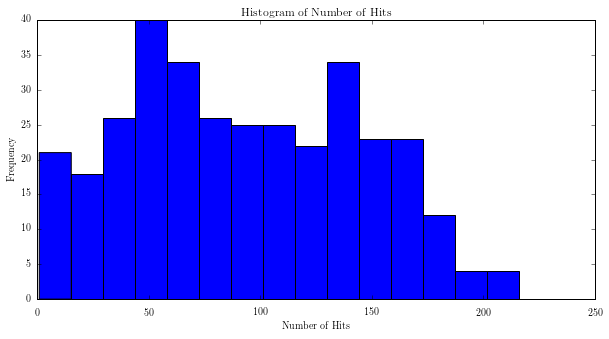

In [11]:
############################################
# Demonstration - Plot a Histogram of Hits #
############################################

f = plt.figure()
plt.hist(baseball['Hits'], bins=15)
plt.xlabel('Number of Hits')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Hits')
f.set_size_inches(10, 5)   
plt.show()

### <span style="color:purple">STUDENT ACTIVITY (7 MINS)</span> 


Work in pairs to import the package `matplotlib.pyplot` and create the following two plots. 

- A histogram of the $log(Salary)$
    
    Hint: To perform the logarithmic transformation on all elements in a numpy array, use the command
    ```python
    np.log(array)
    ```
- A scatterplot of $log(Salary)$ on the x-axis vs $Hits$ on the y-axis

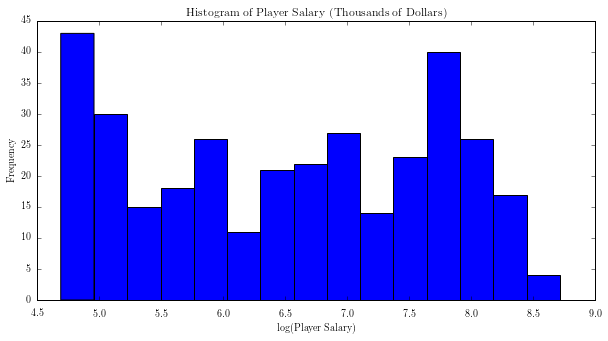

In [14]:
######################################################
# Student Action - Plot a Histogram of log(Salaries) #
######################################################

import matplotlib.pyplot as plt

f = plt.figure()
plt.hist(np.log(baseball['Salary']), bins=15)
plt.xlabel('log(Player Salary)')
plt.ylabel('Frequency')
plt.title('Histogram of Player Salary (Thousands of Dollars)')
f.set_size_inches(10, 5)
plt.show()

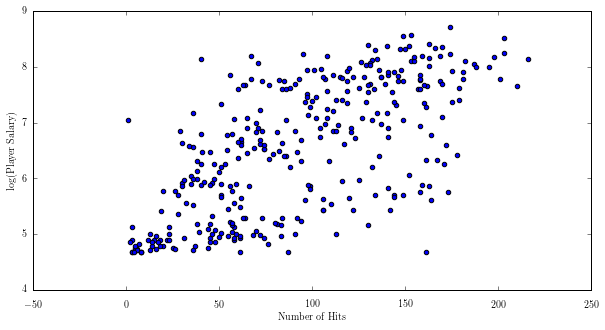

In [15]:
################################################################
# Student Action - Plot a Scatter Plot of Salaries vs. Hitting #
################################################################

f = plt.figure()
plt.scatter(baseball['Hits'], np.log(baseball['Salary']))
plt.xlabel('Number of Hits')
plt.ylabel('log(Player Salary)')
f.set_size_inches(10, 5)
plt.show()

# II. Predictive modeling using linear regression

## Notation and framework

**Linear regression**: a technique for predictive modeling that uses a linear combination of _features_ to predict a continuous outcome variable. We model the outcomes using the functional form below:

\begin{equation*}
\hat y = \beta_0 + \beta_1 x_1 + \dots + \beta_D x_D = \mathbf{x}^T \boldsymbol \beta
\end{equation*}


\begin{eqnarray*}
\hat y &:& \mbox{response or target variable} \\
\mathbf{x} &:& \mbox{vector of predictor feature variables } 
\end{eqnarray*}

\begin{eqnarray*}
\mathbf{x}^T = (1, x_1, \dots, x_D) 
\end{eqnarray*}

\begin{eqnarray*}
\boldsymbol\beta^T = (\beta_0, \beta_1, \dots, \beta_D) : \mbox{Model parameters} 
\end{eqnarray*}

For this baseball dataset exampe, we are interested in predicting player salaries given their batting average, number of hits, on base percentage, and other statistics. In this case, 

* The response variable $\mathbf{\hat y}$ is the log of the salary
* Each of the other variables (HRs, batting average, ...) would correspond to an element $x_1, \dots, x_D$ in the feature vector $\mathbf{x}$. 
* We want to find the set of model parameters $\boldsymbol\beta$ that take the feature vector $\mathbf{x}$ and give the best predictions for player salary

As a simplified example, let's say that we are only interested in predicting salary given a player's number of hits:

\begin{eqnarray*}
\rm{\log salary} = \beta_0 + \beta_1 \rm{(\#~hits)} 
\end{eqnarray*}


To write this more succinctly we can use the variables that we discussed which correspond to our feature vector $\mathbf{x}=(x_1 , \dots, x_D)$, prediction $\hat y$, and model coefficients $\boldsymbol\beta=(\beta_0, \beta_1, \dots)$:

\begin{eqnarray*}
\hat y = \beta_0 + \beta_1 x_1 
\end{eqnarray*}
where

\begin{eqnarray*}
\log \rm{salary} \rightarrow \hat y, \rm{~ ~ ~\# ~ hits} \rightarrow x_1
\end{eqnarray*}


If we were only using one variable (number of hits) to predict a player's salary, then the parameters $\beta_0$ and $\beta_1)$ of our model would be the y-intercept and the slope of a straight line fit to the data in the scatter plot we just made.


We can greatly improve the accuracy of our model by adding in additional variables that correlate with player quality. In this case, our prediction for $y$ has more terms:


\begin{eqnarray*}
\hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \dots
\end{eqnarray*}

where the additional features $x_2, x_3, \dots$ would be other statistics from the baseball season, such as batting average, number of home runs, etc.

** Why is it called linear regression? **

Our model _does not_ need to be linear in the raw data variables, i.e. we could construct a model with terms like $x_1=\rm{(\#~hits)^2}$, $x_2=\rm{\log(home~runs)}$, and so on where features $x_1,\dots,x_D$ are now polynomials or transformations of the original data provided. That is, a model such as 

\begin{equation*}
    \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_1^3 + \beta_4 \sin(x_1)
\end{equation*}

is still a linear regression. The term _linear_ applies to the learned coefficients $\beta$ and not the input features $\mathbf{x}$.  


## How do we learn the model parameters $\beta$? 

We want our best-fitting model to provide predictions that are as close as possible to the actual values of the response variable $y$, i.e. we try to minimze the error between the prediction $\hat y$ and the observed data $y$

Note the notation used here where <u>the subscript $i$ refers to data point $i$</u>. In our example, each player is one data point, so different $i's$ index different players).

\begin{eqnarray*}
    \hat y_i &=& \rm{value ~predicted ~by ~the ~model}    \\
    y_i &=&  \rm{actual~ value ~of ~response ~variable ~from ~the ~data} \\
    \rm{error_i} &=&  y_i - \hat y_i 
\end{eqnarray*}

The straight line in the first plot below is an example of the linear model provides the best fit to the data points. The red lines show the magnitude of the errors/residuals in this model. The second plot shows what residuals in a badly fitting model look like.

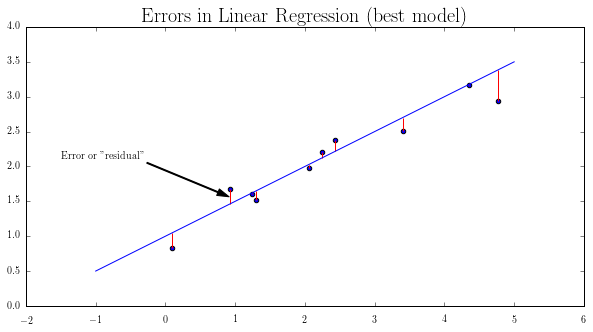

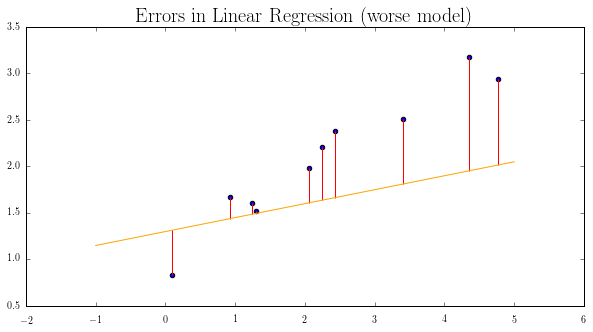

In [38]:
#############################################################
# Demonstration - What do Residuals Look Like (Best model)  #
#############################################################

# we know this is the 'best' model because we cheated and used it to construct our data set

np.random.seed(33)     # Setting a seed allows reproducability of experiments

beta0 = 1              # Creating an intercept
beta1 = 0.5            # Creating a slope

# Randomly sampling data points
x_example = np.random.uniform(0,5,10)
y_example = beta0 + beta1 * x_example + np.random.normal(0,.2,10)
line1 = beta0 + beta1 * np.arange(-1, 6)

f = plt.figure()
plt.scatter(x_example,y_example)   # Plotting observed data
plt.plot(np.arange(-1,6), line1)   # Plotting the true line


for i, xi in enumerate(x_example):
    plt.vlines(xi, beta0 + beta1 * xi, y_example[i], colors='red') # Plotting Residual Lines
    
    
plt.annotate('Error or "residual"', xy = (x_example[5], 1.56), xytext = (-1.5,2.1),
             arrowprops=dict(width=1,headwidth=7,facecolor='black', shrink=0.01))
f.set_size_inches(10,5)
plt.title('Errors in Linear Regression (best model)', fontsize=20)
plt.show()

#############################################################
# Demonstration - What do Residuals Look Like (bad model)
#############################################################


a,b=1.3, 0.3           # make intercept and slope in model worse by these factors

line2 = a*beta0 + beta1*b * np.arange(-1, 6)

f = plt.figure()
# Using same data points as before
plt.scatter(x_example,y_example)   # Plotting observed data
plt.plot(np.arange(-1,6), line2, color='orange')   # Plotting the bad fit line


for i, xi in enumerate(x_example):
    plt.vlines(xi, a*beta0 + b*beta1 * xi, y_example[i], colors='red') # Plotting Residual Lines
    
    
f.set_size_inches(10,5)
plt.title('Errors in Linear Regression (worse model)', fontsize=20)
plt.show()

** Minimizing the loss function **

A **loss function** is a way to quantify how poorly a model is doing in fitting the data. 
Linear Regression can be thought of as an optimization problem where we want to minimize some loss function of the error between the prediction $\hat y$ and the observed data $y$.


Historically, linear regression has been solved using the method of Least Squares where we are interested in minimizing the mean squared error loss function of the form:

\begin{eqnarray*}
    Loss(\boldsymbol\beta) = MSE &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat y_i)^2 \\
\end{eqnarray*}

where $N$ is the total number of observations. In our example, $N$ is the number of baseball players in the data set.

Other loss functions can be used, but using mean squared error (also referred to sum of the squared residuals in other text) has very nice properities for closed form solutions.  We will use this loss function for both gradient descent and to create a closed form matrix solution.


** Matrix notation **

Our expression for the predicted response of the $i^{\rm th}$ data point is

\begin{equation}
\hat y_i = \beta_0 + \beta_1 x_{1, i} + \beta_2 x_{2,i} + \dots + \beta_D x_{D,i}
\end{equation}

If we plugged this into our expression for the MSE loss function, it could take a while to write. 
We can compactify the expression for the loss function by using the following matrix notation:

\begin{equation*}
\mathbf{\hat Y} = \left( \begin{array}{ccc}
\hat y_1 \\
\hat y_2 \\
\vdots \\
\hat y_i \\
\vdots \\
\hat y_N
\end{array} \right)
\qquad
\mathbf{X} = \left( \begin{array}{ccc}
1 & x_{1,1} & x_{1,2} & \dots & x_{1,D} \\
1 & x_{2,1} & x_{2,2} & \dots & x_{2,D} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{i,1} & x_{i,2} & \dots & x_{i,D} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N,1} & x_{N,2} & \dots & x_{N,D} \\
\end{array} \right)
\qquad
\beta = \left( \begin{array}{ccc}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_j \\
\vdots \\
\beta_D
\end{array} \right)
\end{equation*}

Note the column of 1's in the $\mathbf{X}$ feature matrix. This is necessary because of the $\beta_0$ intercept parameter in the model.

Then the expression for the model predictions can be written in a much simpler form:

\begin{equation*}
\mathbf{\hat Y}= \mathbf{X^T} \boldsymbol \beta
\end{equation*}

The prediction for the $i^{\rm th}$ data point is 

\begin{equation*}
\hat y_i = \mathbf{\hat Y_i} = \mathbf{X_i^T} \boldsymbol \beta
\end{equation*}

and the MSE loss function is

\begin{eqnarray*}
Loss(\boldsymbol \beta) &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - \mathbf{X_i^T} \boldsymbol \beta)^2 \\
&=& \frac{1}{N} (\mathbf{\hat Y} -\mathbf{X^T} \boldsymbol \beta )^\mathbf{T} (\mathbf{\hat Y} -\mathbf{X^T} \boldsymbol \beta )
\end{eqnarray*}

## Gradient descent: algorithm for fitting a model

In linear regression we are interested in optimizing our loss function $Loss(\boldsymbol \beta)$ to find the optimal $\beta$ such that 

\begin{eqnarray*}
\hat \beta &=& \arg \min_{\beta} \frac{1}{N} \sum_{i=1}^{N} (y_i - \mathbf{x_i^T}\beta)^2 \\
&=& \arg \min_{\beta} \frac{1}{N} \mathbf{(Y - X\beta)^T (Y - X\beta)} \\
\end{eqnarray*}

One optimization technique called 'gradient descent' is useful for finding an optimal solution to this problem.  Gradient descent is a first order optimization technique that attempts to find a local minimum of a function by updating its position by taking steps proportional to the negative gradient of the function at its current point.  The gradient at the point indicates the direction of steepest ascent and is the best guess for which direction the algorithm should go.  

If we consider $\boldsymbol \beta$ to be some parameters we are interested in optimizing, $L(\boldsymbol \beta)$ to be our loss function, and $\alpha$ to be our step size proportionality, then we have the following algorithm:



**Algorithm - Gradient Descent**


* Initialize $\boldsymbol \beta$

* While $\alpha | \nabla L(\boldsymbol \beta) | < \rm{tolerance} $:

    * $\boldsymbol \beta := \boldsymbol \beta - \alpha \nabla_{\boldsymbol \beta} L(\boldsymbol \beta )$



For our problem at hand, we therefore need to find $\nabla L(\boldsymbol \beta)$. The partial deriviative of $L(\boldsymbol \beta)$ with respect to the $j^{th}$ feature is:

\begin{eqnarray*}
    \frac{\partial L(\boldsymbol \beta)}{\partial \boldsymbol \beta_j} = -\frac{2}{N}\sum_{i=1}^{N} (y_i - \mathbf{x_i^T}\boldsymbol \beta)\cdot{\mathbf{x_{i,j}}}
\end{eqnarray*}

In matrix notation this can be written:

\begin{eqnarray*}
Loss(\beta) &=& \frac{1}{N}\mathbf{(\hat Y - X\boldsymbol\beta)^T (\hat Y - X\boldsymbol\beta)} \\
&=& \frac{1}{N}\mathbf{(\hat Y^T \hat Y} - 2 \mathbf{\boldsymbol\beta^T X^T \hat Y + \boldsymbol\beta^T X^T X\boldsymbol\beta)} \\
\nabla_{\boldsymbol\beta} L(\boldsymbol\beta) &=& \frac{1}{N} (-2 \mathbf{X^T \hat Y} + 2 \mathbf{X^T X \boldsymbol\beta)} \\
&=& -\frac{2}{N} \mathbf{X^T (\hat Y - X \boldsymbol\beta)} \\
\end{eqnarray*}


### <span style="color:purple">STUDENT ACTIVITY (7 MINS)</span> 

Create a function that returns the gradient of $L(\boldsymbol \beta)$.

In [40]:
###################################################################
# Student Action - Programming the Gradient
###################################################################

def gradient(X, y, betas):
    #****************************
    # Your code here!
    err = y - np.dot(X, betas)
    return -2*np.dot(X.transpose(),err)/len(y)
    #****************************
    

####################################################################
# Testing your gradient function-- no need to write anything below #
####################################################################
np.random.seed(33)
X = pd.DataFrame({'ones':1, 
                  'X1':np.random.uniform(0,1,50)})
y = np.random.normal(0,1,50)
betas = np.array([-1,4])
grad_expected = np.array([ 2.98018138,  7.09758971])
grad = gradient(X,y,betas)
try:
    np.testing.assert_almost_equal(grad, grad_expected)
    print "Test Passed!"
except AssertionError:
    print "*******************************************"
    print "ERROR: Something isn't right... Try Again!"
    print "*******************************************"


Test Passed!


### <span style="color:purple">STUDENT ACTIVITY (15 MINS)</span> 

Use the gradient function that you wrote above to complete the gradient descent for the baseball dataset.


We have set-up the all necessary matrices and starting values.  In the designated section below code the algorithm from the previous section above. 

In [43]:
# Setting up our matrices 
Y = np.log(baseball['Salary'])
N = len(Y)
X = pd.DataFrame({'ones' : np.ones(N), 
                  'Hits' : baseball['Hits']})
p = len(X.columns)

# Initializing the beta vector 
betas = np.array([0.015,5.13])

# Initializing Alpha
alph = 0.00001

# Setting a tolerance 
tol = 1e-8

###################################################################
# Student Action - Programming the Gradient Descent Algorithm Below
###################################################################

err = Y - np.dot(X, betas)
grad = gradient(X,Y,betas)
niter = 1.
while (alph*np.linalg.norm(gradient(X,Y,betas)) > tol) and (niter < 20000):
    #****************************
    # Your code here!
    betas = betas - alph*gradient(X,Y,betas)
    niter += 1
    #****************************

print niter, betas

try:
    beta_expected = np.array([ 0.01513772, 5.13000121])
    np.testing.assert_almost_equal(betas, beta_expected)
    print "Test Passed!"
except AssertionError:
    print "*******************************************"
    print "ERROR: Something isn't right... Try Again!"
    print "*******************************************"

33.0 [ 0.01513772  5.13000121]
Test Passed!


** Comments on Gradient Descent **

- Advantages
    - Very general algorithm $\rightarrow$ gradient descent and its variants are used throughout machine learning and statistics
    
- Disadvantages 
    - Highly sensitive to initial starting conditions
    - Not guaranteed to find the global optima
    - How do you choose step size $\alpha$?
        - Too small $\rightarrow$ May never find the minima
        - Too large $\rightarrow$ May step past the minima
        - Can we fix it?
            - Adaptive step sizes
            - Newton's Method for Optimization
                - http://en.wikipedia.org/wiki/Newton%27s_method_in_optimization
            - Each correction obviously comes with it's own computational considerations.

See the supplementary material for any help necessary with scripting this in Python.

### Visualizing Gradient Descent to Understand its Limitations 

Let's try to find the value of $X$ that maximizes the following function:

\begin{equation}
    f(x) = w \times \frac{1}{\sqrt{2\pi \sigma_1^2}}  \exp \left( - \frac{(x-\mu_1)^2}{2\sigma_1^2}\right) +  (1-w) \times \frac{1}{\sqrt{2\pi \sigma_2^2}}  \exp \left( - \frac{(x-\mu_2)^2}{2\sigma_2^2}\right)
\end{equation}

where $w=0.3$, $\mu_1 = 3, \sigma_1^2=1$ and $\mu_2 = -1, \sigma_2^2=0.5$

Let's visualize this function

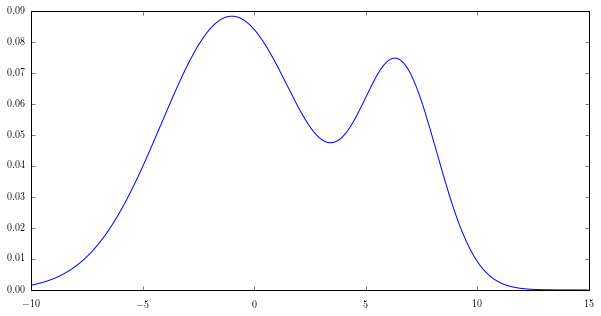

In [55]:
x1 = np.arange(-10, 15, 0.05)
mu1 = 6.5 
var1 = 3
mu2 = -1
var2 = 10
weight = 0.3
def mixed_normal_distribution(x, mu1, var1, mu2, var2):
    pdf1 = np.exp( - (x - mu1)**2 / (2*var1) ) / np.sqrt(2 * np.pi * var1)
    pdf2 = np.exp( - (x - mu2)**2 / (2*var2) ) / np.sqrt(2 * np.pi * var2)
    return weight * pdf1 + (1-weight )*pdf2

pdf = mixed_normal_distribution(x1, mu1, var1, mu2, var2)
fig = plt.figure()
plt.plot(x1, pdf)
fig.set_size_inches([10,5])
plt.show()

### Now let's show visualize happens for different starting conditions and different step sizes

Play around with the starting position `x` and the step size `alph`.

-0.998334288352 32.0


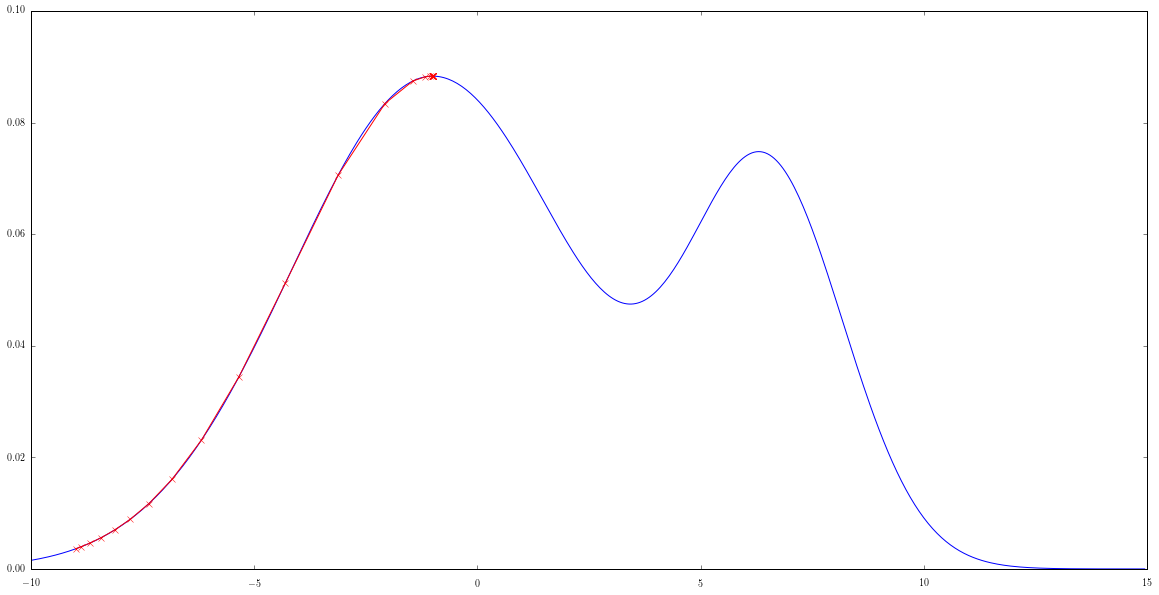

In [78]:
def mixed_gradient(x, mu1, var1, mu2, var2):
    grad_pdf1 =  np.exp( - (x - mu1)**2 / (2*var1) ) * ((x-mu1)/var1) / np.sqrt(2 * np.pi * var1)
    grad_pdf2 =  np.exp( - (x - mu2)**2 / (2*var2) ) * ((x-mu2)/var2)  / np.sqrt(2 * np.pi * var2)
    return weight * grad_pdf1 + (1-weight)*grad_pdf2

# Initialize X
x = -9
# Initializing Alpha
alph = 70
# Setting a tolerance 
tol = 1e-8
niter = 1.
results = []

while (alph*np.linalg.norm(mixed_gradient(x, mu1, var1, mu2, var2)) > tol) and (niter < 500000):
    #****************************
    results.append(x)
    x = x - alph * mixed_gradient(x, mu1, var1, mu2, var2)
    niter += 1
    
    #****************************
print x, niter

if niter < 500000:
    exes = mixed_normal_distribution(np.array(results), mu1, var1, mu2, var2)
    fig = plt.figure()
    plt.plot(x1, pdf)
    plt.plot(results, exes, color='red', marker='x')
    plt.ylim([0,0.1])
    fig.set_size_inches([20,10])
    plt.show()

else:
    print('Not converged')

## Linear Regression Matrix Solution

You may have recognized that we could actually solve for $\boldsymbol\beta$ directly.  

\begin{eqnarray*}
Loss(\boldsymbol\beta) &=& \frac{1}{N}\mathbf{(\hat Y - X\boldsymbol\beta)^T (\hat Y - X\boldsymbol\beta)} \\
\nabla_{\boldsymbol\beta} L(\boldsymbol\beta) &=& \frac{1}{N} (-2 \mathbf{X^T \hat Y} + 2 \mathbf{X^T X \beta}) \\
\end{eqnarray*}

Setting to zero,

\begin{eqnarray*}
-2 \mathbf{X^T  Y} + 2 \mathbf{X^T X} \boldsymbol\beta &=& 0 \\
\mathbf{X^T X \boldsymbol\beta}  &=& \mathbf{X^T  Y} \\
\end{eqnarray*}

Note that the $\mathbf Y$ in the above two lines is the response variable from the data. If we assume that the columns $X$ are linearly independent then

\begin{eqnarray*}
 \boldsymbol \beta_{\rm optimum}  &=& \mathbf{(X^T X)^{-1}X^T   Y} \\
\end{eqnarray*}

This is called the _Ordinary Least Squares_ (OLS) Estimator.


** Comments on solving the loss function directly **

- Advantages: 

    - Simple solution to code 
- Disadvantages: 

    - The design matrix must be full rank to invert
        - Can be corrected with a generalized inverse solution
    - Inverting a matrix can be a computational expensive operation
        - If we have a design matrix that has $N$ observations and $D$ predictors, then X is $(N\times D)$ it follows then that
    
    \begin{eqnarray*}
        \mathbf{X^TX} \mbox{ is of size } (D \times N) \times (N \times D) = (D \times D) \\
    \end{eqnarray*}
    
        - If a matrix is of size $(D\times D)$, the computational cost of inverting it is $O(D^3)$.  
        - Thus inverting a matrix is directly related to the number of predictors that are included in the analysis.  


## <span style="color:purple">STUDENT ACTIVITY (10 MINS)</span> 
Solve for $\hat \beta$ directly using OLS on the Baseball Dataset - 10 min
    
- Review the Supplementary Materials for help with Linear Algebra

In [44]:
###################################################################
# Student Action - Programming the Gradient
###################################################################

def gradient(X, y, betas):
    #****************************
    # Your code here!
    err = y - np.dot(X, betas)
    return -2*np.dot(X.transpose(),err)/len(y)
    #****************************
    

#########################################################
# Testing your gradient function
#########################################################
np.random.seed(33)
X = pd.DataFrame({'ones':1, 
                  'X1':np.random.uniform(0,1,50)})
y = np.random.normal(0,1,50)
betas = np.array([-1,4])
grad_expected = np.array([ 2.98018138,  7.09758971])
grad = gradient(X,y,betas)
try:
    np.testing.assert_almost_equal(grad, grad_expected)
    print "Test Passed!"
except AssertionError:
    print "*******************************************"
    print "ERROR: Something isn't right... Try Again!"
    print "*******************************************"


Test Passed!


# III. Linear Regressin using `scikit-learn`

As we've shown in the previous two exercises, when coding these algorithms ourselves, we must consider many things such as selecting step sizes, considering the computational cost of inverting matrices.  For many applications though, packages have been created that have taken into consideration many of these parameter selections.  We now turn our attention to the Python package for machinelearning called 'scikit-learn'.  

- http://scikit-learn.org/stable/

Included is the documentation for the scikit-learn implementation of Ordinary Least Squares from their linear models package

- _Generalized Linear Models Documentation:_ 
    - http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

- _LinearRegression Class Documentation:_  
    - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

From this we that we'll need to import the module `linear_model` using the following:

    from sklearn import linear_model
    
Let's examine an example using the `LinearRegression` class from scikit-learn.  We'll continue with the simulated data from the beginning of the exercise

### Example using the variables from the Residual Example

** Notes ** 

- Calling `linear_model.LinearRegression()` creates an object of class  `sklearn.linear_model.base.LinearRegression`
    - Defaults 
        - `fit_intercept = True`: automatically adds a column vector of ones for an intercept
        - `normalize = False`: defaults to not normalizing the input predictors
        - `copy_X = False`: defaults to not copying X
        - `n_jobs = 1`: The number of jobs to use for the computation. If -1 all CPUs are used. This will only provide speedup for n_targets > 1 and sufficient large problems.
    - Example
        - `lmr = linear_model.LinearRegression()`
- To fit a model, the method `.fit(X,y)` can be used
    - X is a matrix where each row corresponds to one data point's features, i.e. the same format that we discussed above under 'Matrix Notation'
        - This can be accomplished by creating a DataFrame using `pd.DataFrame()`
    - Example
        - `lmr.fit(X,y)`
- To predict out of sample values, the method `.predict(X)` can be used
- To see the $\beta$ estimates use `.coef_` for the coefficients for the predictors and `.intercept` for $\beta_0$

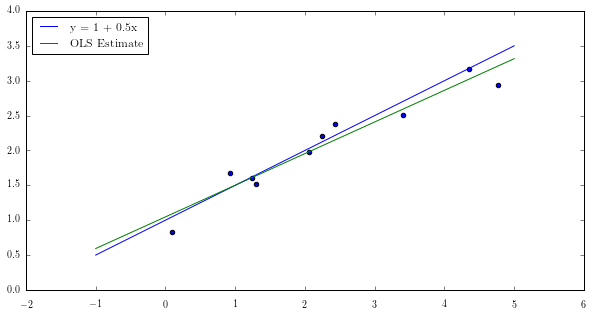

beta_1= [[ 0.45365498]]
beta_0= [ 1.047403]


In [51]:
#############################################################
# Demonstration - scikit-learn with Regression Example
#############################################################

from sklearn import linear_model

lmr = linear_model.LinearRegression()
lmr.fit(pd.DataFrame(x_example), pd.DataFrame(y_example))

xTest = pd.DataFrame(np.arange(-1,6))
yHat = lmr.predict(xTest)

f = plt.figure()
plt.scatter(x_example, y_example)
p1, = plt.plot(np.arange(-1,6), line1)
p2, = plt.plot(xTest, yHat)
plt.legend([p1, p2], ['y = 1 + 0.5x', 'OLS Estimate'], loc=2)
f.set_size_inches(10,5)
plt.show()


print 'beta_1=',lmr.coef_
print 'beta_0=',lmr.intercept_

## <span style="color:purple">STUDENT ACTIVITY (15 MINS)</span> 

Use the scikit-learn method to perform a linear regression fit for predicting $\log \rm{Salary}$ given a players number of hits in the season. Find the intercept ($\beta_0$) and slope ($\beta_1$) of the best-fitting line.

If you are ambitious, plot the best-fitting line on top of the scatter plot of hits vs. log(salary).

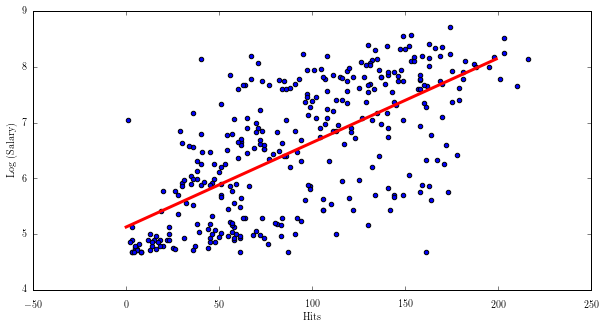

beta_1= [ 0.01513353]
beta_0= 5.13051681568


In [52]:
#########################################################################
# Student Action - Use scikit-learn to calculate the beta coefficients  #
#                                                                       #
# Note: You no longer need the intercept column in your X matrix for    #
#       sci-kit Learn.  It will add that column automatically.          #
#########################################################################

lmr2 = linear_model.LinearRegression(fit_intercept=True)
lmr2.fit(pd.DataFrame(baseball['Hits']),Y)
xtest = np.arange(0,200)
ytest = lmr2.intercept_ + lmr2.coef_*xtest

f = plt.figure()
plt.scatter(baseball['Hits'], np.log(baseball['Salary']))
plt.plot(xtest, ytest, color='r', linewidth=3)
f.set_size_inches(10,5)
plt.xlabel('Hits')
plt.ylabel('Log (Salary)')
plt.show()
 
print 'beta_1=',lmr2.coef_
print 'beta_0=',lmr2.intercept_

# IV. Linear Regression in the Real World

In the real world, Linear Regression for predictive modeling doesn't end once you've fit the model. Models are often fit and used to predict user behavior, used to quantify business metrics, or sometimes used to identify cats faces for internet points.  In that pursuit, it isn't really interesting to fit a model and assess its performance on data that has already been observed.  The real interest lies in _**how it predicts future observations!**_

Often times then, we may be susceptible to creating a model that is perfected for our observed data, but that does not generalize well to new data.  In order to assess how we perform to new data, we can _score_ the model on both the old and new data, and compare the models performance with the hope that the it generalizes well to the new data. After lunch we'll introduce some techniques and other methods to better our chances of performing well on new data. 

Before we break for lunch though, let's take a look at a simulated dataset to see what we mean...

**Situation**

Imagine that last year a talent management company managed 400 celebrities and tracked how popular they were within the public eye, as well various predictors for that metric.  The company is now interested in managing a few new celebrities, but wants to sign those stars that are above a certain 'popularity' threshold to maintain their image.

Our job is to predict how popular each new celebrity will be over the course of the coming year so that we make that best decision about who to manage. For this analysis we'll use a function `l2_error` to compare our errors on a training set, and on a test set of celebrity data.

The variable `celeb_data_old` represents things we know about the previous batch of celebrities.  Each row represents one celeb.  Each column represents some tangible measure about them -- their age at the time, number of Twitter followers, voice squeakiness, etc.  The specifics of what each column represents aren't important.

Similarly, `popularity_score_old` is a previous measure of the celebrities popularity.

Finally, `celeb_data_new` represents the same information that we had from `celeb_data_old` but for the new batch of internet wonders that we're considering.

How can we predict how popular the NEW batch of celebrities will be ahead of time so that we can decide who to sign? And are these estimates stable from year to year?

In [53]:
with np.load('data/mystery_data_old.npz') as data:
    celeb_data_old = data['celeb_data_old']
    popularity_old = data['popularity_old']
    celeb_data_new = data['celeb_data_new']

lmr3 = linear_model.LinearRegression()
lmr3.fit(celeb_data_old, popularity_old)
predicted_popularity_old = lmr3.predict(celeb_data_old)
predicted_popularity_new = lmr3.predict(celeb_data_new)

def l2_error(y_true, y_pred):
    """
    calculate the sum of squared errors (a.k.a. "L2 error") 
    given a vector of true ys and a vector of predicted ys
    """
    diff = (y_true-y_pred)
    return np.sqrt(np.dot(diff, diff))

print "Predicted L2 Error:", l2_error(popularity_old, predicted_popularity_old)

# print "Popularity prediction for the first 10 new cat wranglers:"
# print predicted_profits[:10, np.newaxis]

Predicted L2 Error: 18.1262825607


### Checking How We Did
At the end of the year, we tally up the popularity numbers for each celeb and check how well we did on our predictions.

In [54]:
with np.load('data/mystery_data_new.npz') as data:
    popularity_new = data['popularity_new']

print "Predicted L2 Error:", l2_error(popularity_new, predicted_popularity_new)

Predicted L2 Error: 24.173135433


Something's not right... our model seems to be performing worse on this data!  Our model performed so well on last year's data, why didn't it work on the data from this year?